# China data
Data from Chinese population.

See He et al. 2018 - https://doi.org/10.1038/s41591-018-0164-x

## Libraries

In [30]:
library(cowplot)
library(ggplot2)
library(dplyr)
library(knitr)
library(broom)
library(caret)
library(lspline)
library(scales)

Combine alpha result to mapping file

In [31]:
mapping_file = read.table("./data/China_mapping.txt", header = TRUE, comment.char = '', sep = "\t", check.names = FALSE)
mapping_file

#SampleID,BarcodeSequence,LinkerPrimerSequence,center_name,description_prep,dna_extraction_date,experiment_design_description,forward_barcode,forward_primer,instrument_model,⋯,ua,vegetables,waist,weight,yellow_rice_wine,qiita_study_title,qiita_study_alias,qiita_owner,qiita_principal_investigator,Description
11757.G441802339,TCATGCCTTTACCGGTCG,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.04.25,study of fecal samples from a population in southern China,TCATGCCTT,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,450.85,146000,96.15,75.9,0,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G441802339
11757.G440305397,ATTATCGTGTGAATATCG,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.03.14,study of fecal samples from a population in southern China,ATTATCGTG,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,289.30,131400,79.50,60.8,2600,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G440305397
11757.G440981185,AGATCCGCCAGATTGCCA,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.04.11,study of fecal samples from a population in southern China,AGATCCGCC,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,274.60,219000,78.00,53.3,0,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G440981185
11757.G440606309,TTCTTCTAGATACCGGTT,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.03.01,study of fecal samples from a population in southern China,TTCTTCTAG,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,482.65,219000,90.20,74.9,0,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G440606309
11757.G440606308,TTAGGAGTAATACCGGTT,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.03.01,study of fecal samples from a population in southern China,TTAGGAGTA,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,315.55,73000,65.30,47.0,0,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G440606308
11757.G440606307,TTAGCTCATATACCGGTT,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.03.01,study of fecal samples from a population in southern China,TTAGCTCAT,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,310.25,164250,86.75,64.4,0,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G440606307
11757.G440606306,TTACAGTGAATACCGGTT,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.03.01,study of fecal samples from a population in southern China,TTACAGTGA,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,416.05,164250,75.10,56.1,0,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G440606306
11757.G440606305,TTACTCACTATACCGGTT,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.03.01,study of fecal samples from a population in southern China,TTACTCACT,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,548.05,255500,93.15,80.7,0,Regional variation greatly limits application of healthy gut microbiome reference ranges and disease models,GGMP regional variation,Xian Wang,Hongwei Zhou,sample G440606305
11757.G440606304,TTAAGGAAGATACCGGTT,XXQIITAXX,"Southern Medical University, Guangzhou, China",None,2016.03.01,study of fecal samples from a population in southern China,TTAAGGAAG,GTGTGYCAGCMGCCGCGGTAA,Illumina HiSeq 2500,⋯,312.60,219000,65.20,47.8,0,Regional variation greatly limits application of health

In [32]:
select_table = mapping_file %>% select("#SampleID","BarcodeSequence","age","sex","bmi","antibiotics","Description")

In [33]:
otus_1250 = read.table("./data/alpha-diversity_otus_1250.tsv", header = TRUE, sep="\t", check.names = FALSE, colClasses = c("character","numeric"))
shannon_1250 = read.table("./data/alpha-diversity_shannon_1250.tsv", header = TRUE, sep = "\t", check.names = FALSE,colClasses = c("character","numeric"))

In [34]:
alpha_1250 = merge.data.frame(otus_1250,shannon_1250)

In [35]:
names(alpha_1250) = c("#SampleID","observed_otus_1250","shannon_1250")
alpha_data = alpha_1250

In [36]:
combine_table = merge(select_table, alpha_data, by = "#SampleID")

In [37]:
health_table = subset(combine_table, age>=20 & age <=69 & antibiotics == "n" & bmi >=18.5 & bmi <= 30.0)

In [38]:
health_table$Description = NA
health_table$Description[health_table$age <=45] = "Young"
health_table$Description[health_table$age >45] = "Old"
health_table$Description = factor(health_table$Description, levels=c("Young","Old"))

In [14]:
health_table

,#SampleID,BarcodeSequence,age,sex,bmi,antibiotics,Description,observed_otus_1250,shannon_1250
2,11757.G440104003,TTATATGCGAACTCCATT,69,male,22.0,n,Old,80,4.290298
4,11757.G440104005,TTAAGGAAGAACTCCATT,39,male,22.3,n,Young,80,4.334422
7,11757.G440104008,TTAGCTCATAACTCCATT,68,male,22.8,n,Old,74,4.203152
9,11757.G440104013,TTCTTCTAGAACTCCATT,62,female,22.0,n,Old,122,5.019128
10,11757.G440104014,TTCTAGATCAACTCCATT,64,male,24.1,n,Old,120,5.310091
11,11757.G440104015,TTCATTCCAAACTCCATT,64,male,22.5,n,Old,120,5.257573
12,11757.G440104016,TTCAACGGTAACTCCATT,61,female,23.9,n,Old,69,3.553668
13,11757.G440104017,TTCCGTGACAACTCCATT,45,female,23.8,n,Young,133,5.045300
14,11757.G440104021,TTCGCAACGAACTCCATT,64,male,22.1,n,Old,67,4.094696
15,11757.G440104022,TTGTCTAGAAACTCCATT,53,female,25.3,n,Old,77,4.124667


In [39]:
subset(health_table, sex == "male" & Description =='Old') %>% summary

            #SampleID              BarcodeSequence      age       
 11757.G440104003:   1   AACATGCTCAACATGGAG:   1   Min.   :46.00  
 11757.G440104008:   1   AACATGCTCAACTCCATT:   1   1st Qu.:52.00  
 11757.G440104014:   1   AACATGCTCACAATTCTG:   1   Median :58.00  
 11757.G440104015:   1   AACATGCTCACTTGAACG:   1   Mean   :57.36  
 11757.G440104021:   1   AACATGCTCAGATGAGAT:   1   3rd Qu.:63.00  
 11757.G440104027:   1   AACATGCTCAGATTGCCA:   1   Max.   :69.00  
 (Other)         :1515   (Other)           :1515                  
     sex            bmi        antibiotics Description  observed_otus_1250
 female:   0   Min.   :18.50   n:1521      Young:   0   Min.   : 24.0     
 male  :1521   1st Qu.:21.40   y:   0      Old  :1521   1st Qu.: 82.0     
               Median :23.30                            Median :100.0     
               Mean   :23.44                            Mean   :101.4     
               3rd Qu.:25.30                            3rd Qu.:119.0     
              

In [40]:
subset(health_table, sex == "male" & Description =='Old')$age %>% sd
subset(health_table, sex == "male" & Description =='Old')$observed_otus_1250 %>% sd
subset(health_table, sex == "male" & Description =='Old')$shannon_1250 %>% sd

[1] 6.750466

[1] 28.49615

[1] 0.9471482

In [17]:
labels = c(Young = "20-45", Old = "46-69")

In [23]:
health_table %>% head

,#SampleID,BarcodeSequence,age,sex,bmi,antibiotics,Description,observed_otus_1250,shannon_1250
2,11757.G440104003,TTATATGCGAACTCCATT,69,male,22.0,n,Old,80,4.290298
4,11757.G440104005,TTAAGGAAGAACTCCATT,39,male,22.3,n,Young,80,4.334422
7,11757.G440104008,TTAGCTCATAACTCCATT,68,male,22.8,n,Old,74,4.203152
9,11757.G440104013,TTCTTCTAGAACTCCATT,62,female,22.0,n,Old,122,5.019128
10,11757.G440104014,TTCTAGATCAACTCCATT,64,male,24.1,n,Old,120,5.310091
11,11757.G440104015,TTCATTCCAAACTCCATT,64,male,22.5,n,Old,120,5.257573


In [42]:
# SV Richness
rich_null = lm(observed_otus_1250~1, data = health_table)
rich_lm = lm(observed_otus_1250~age, data = health_table)
rich_ls = lm(observed_otus_1250~lspline(age, c(45)), data = health_table)

AIC_rich = c(fit0 = AIC(rich_null), fit1 = AIC(rich_lm), fit2 = AIC(rich_ls)) %>%
    print

summary(rich_ls)

# Shannon
shannon_null = lm(shannon_1250~1, data = health_table)
shannon_lm = lm(shannon_1250~age, data = health_table)
shannon_ls = lm(shannon_1250~lspline(age, c(45)), data = health_table)

AIC_shannon = c(fit0 = AIC(shannon_null), fit1 = AIC(shannon_lm), fit2 = AIC(shannon_ls)) %>%
    print

    fit0     fit1     fit2 
47230.98 47231.90 47231.52 



Call:
lm(formula = observed_otus_1250 ~ lspline(age, c(45)), data = health_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.517 -19.556  -1.195  19.204 238.939 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          98.23292    3.06098  32.092   <2e-16 ***
lspline(age, c(45))1  0.07636    0.07844   0.974   0.3303    
lspline(age, c(45))2 -0.11341    0.06102  -1.859   0.0631 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.19 on 4960 degrees of freedom
Multiple R-squared:  0.0006965,	Adjusted R-squared:  0.0002936 
F-statistic: 1.729 on 2 and 4960 DF,  p-value: 0.1777


    fit0     fit1     fit2 
13132.91 13119.24 13116.77 


In [43]:
health_table$Description = factor(health_table$Description, levels=c("Young","Old"))
labels = c(Young = "20 - 45", Old = "46-69")

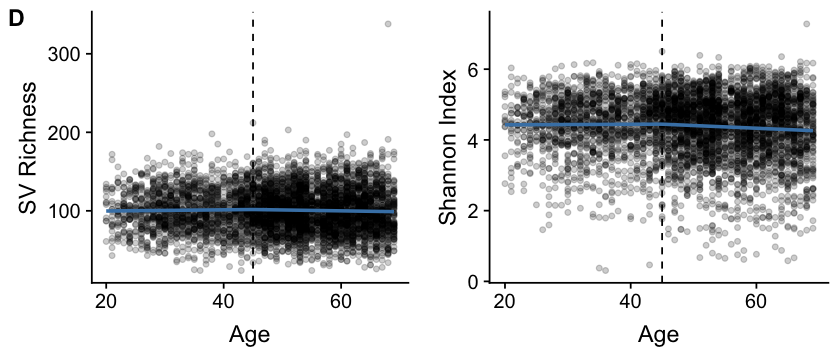

In [54]:
China_richness_spline = ggplot(health_table, aes(x = age, y = observed_otus_1250)) +
    geom_point(size = 1.3, alpha = 0.2) +
    geom_vline(xintercept = c(45), linetype="dashed") +
    geom_smooth(method = "lm", formula = y~lspline(x,c(45)), se = F, color = "steelblue") +
    labs(x = "Age", y = "SV Richness") +
    scale_x_continuous(breaks = pretty_breaks(n = 3))
    
China_shannon_spline = ggplot(health_table,  aes(x = age, y = shannon_1250)) +
    geom_point(size = 1.3, alpha = 0.2) +
    geom_vline(xintercept = c(45), linetype="dashed") +
    geom_smooth(method = "lm", formula = y~lspline(x,c(45)), se = F, color = "steelblue") +
    labs(x = "Age", y = "Shannon Index") +
    scale_x_continuous(breaks = pretty_breaks(n = 3))
 

China_div_spline = plot_grid(China_richness_spline, China_shannon_spline, nrow = 1, labels = c("D", ""))
ggsave(filename = "./images/China_alpha_spline.png", 
       plot = China_div_spline, width = 7, height = 3,
       device = "png", dpi = "print")
plot(China_div_spline)

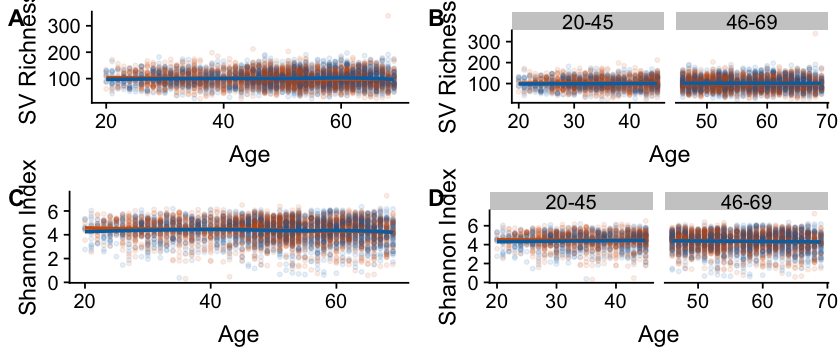

In [21]:
# Plots
options(repr.plot.width=7, repr.plot.height=3)

richness_1250 = ggplot(health_table, aes(x= age, y = observed_otus_1250, color = sex)) + 
    geom_point(size = 1, alpha = 0.1) + 
    geom_smooth(method="loess", se = F) + 
    labs(x = "Age", y = "SV Richness") +
    scale_color_manual(values = c("#D55E00", "#0072B2"), labels = c("Female", "Male")) +
    scale_x_continuous(breaks = pretty_breaks(n = 3)) +
    theme(legend.position="none")

shannon_1250 = ggplot(health_table, aes(x = age, y = shannon_1250, color = sex)) + 
    geom_point(size=1, alpha = 0.1) + 
    geom_smooth(method="loess", se = F) + 
    labs(x = "Age", y = "Shannon Index") +
    scale_color_manual(values = c("#D55E00", "#0072B2"), labels = c("Female", "Male")) +
    scale_x_continuous(breaks = pretty_breaks(n = 3)) +
    theme(legend.position="none")

richness_age_group_1250 = ggplot(health_table, aes(x = age, y = observed_otus_1250, color = sex)) +
    geom_point(size=1, alpha = 0.1) + 
    geom_smooth(method="lm", se = F) + 
    facet_wrap(~Description, scales = "free_x", labeller = labeller(Description = labels)) + 
    labs(x = "Age", y = "SV Richness") +
    scale_x_continuous(breaks = c(20,30,40,50,60,70)) +
    scale_color_manual(values = c("#D55E00", "#0072B2"), labels = c("Female", "Male")) +
    theme(legend.position="none")

shannon_age_group_1250 = ggplot(health_table, aes(x = age, y = shannon_1250, color = sex)) +
    geom_point(size=1, alpha = 0.1) + 
    geom_smooth(method="lm", se = F) + 
    facet_wrap(~ Description, scales = "free_x", labeller = labeller(Description = labels)) + 
    labs(x = "Age", y = "Shannon Index") +
    scale_x_continuous(breaks = c(20,30,40,50,60,70)) +
    scale_color_manual(values = c("#D55E00", "#0072B2"), labels = c("Female", "Male")) +
    theme(legend.position="none")

combine_plot = plot_grid(richness_1250, richness_age_group_1250, shannon_1250, shannon_age_group_1250, ncol = 2, labels = "AUTO")
combine_plot


In [79]:
# Manuscript plots
rich_gph = plot_grid(richness_1250, richness_age_group_1250, ncol = 2, labels = c("D", ""))
shannon_gph = plot_grid(shannon_1250, shannon_age_group_1250, ncol = 2, labels = c("D", ""))

ggsave(filename = "./images/China_rich_gph.png", plot = rich_gph, 
       width = 7, height = 3, 
       device = "png", dpi = "print")

ggsave(filename = "./images/China_shannon_gph.png", plot = shannon_gph, 
       width = 7, height = 3,
       device = "png", dpi = "print")

## Rarefaction at 1250 reads/sample

In [80]:
# SV richness
# ANCOVA
otu_ancova_1250 = lm(observed_otus_1250 ~ sex * age, data = health_table)
summary(otu_ancova_1250)
anova(otu_ancova_1250)


Call:
lm(formula = observed_otus_1250 ~ sex * age, data = health_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.660 -19.648  -1.202  18.943 239.759 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 105.50651    2.23839  47.135   <2e-16 ***
sexmale      -7.27069    3.37132  -2.157   0.0311 *  
age          -0.10685    0.04410  -2.423   0.0154 *  
sexmale:age   0.15857    0.06555   2.419   0.0156 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.18 on 4959 degrees of freedom
Multiple R-squared:  0.001525,	Adjusted R-squared:  0.0009208 
F-statistic: 2.524 on 3 and 4959 DF,  p-value: 0.05583


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,449.5824,449.5824,0.5661499,0.45182863
age,1,916.7403,916.7403,1.1544322,0.28267553
sex:age,1,4647.5827,4647.5827,5.8526051,0.01558976
Residuals,4959,3937966.4806,794.1050,NA,NA


In [81]:
# Two way anova
otu_anova_1250 = lm(observed_otus_1250 ~ sex + age, data = health_table)
summary(otu_anova_1250)
anova(otu_anova_1250)


Call:
lm(formula = observed_otus_1250 ~ sex + age, data = health_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.706 -19.698  -1.181  19.170 238.415 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 101.96852    1.69542  60.144   <2e-16 ***
sexmale       0.64843    0.80691   0.804    0.422    
age          -0.03506    0.03264  -1.074    0.283    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 28.19 on 4960 degrees of freedom
Multiple R-squared:  0.0003464,	Adjusted R-squared:  -5.665e-05 
F-statistic: 0.8595 on 2 and 4960 DF,  p-value: 0.4235


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,449.5824,449.5824,0.5655965,0.4520497
age,1,916.7403,916.7403,1.1533038,0.2829108
Residuals,4960,3942614.0633,794.8819,NA,NA


In [82]:
# Shannon
# ANCOVA
shannon_ancova_1250 = lm(shannon_1250 ~ sex * age, data = health_table)
summary(shannon_ancova_1250)
anova(shannon_ancova_1250)


Call:
lm(formula = shannon_1250 ~ sex * age, data = health_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1661 -0.5138  0.1268  0.6461  2.9930 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.685574   0.072024  65.055  < 2e-16 ***
sexmale     -0.224122   0.108478  -2.066   0.0389 *  
age         -0.005881   0.001419  -4.144 3.47e-05 ***
sexmale:age  0.003933   0.002109   1.865   0.0623 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9067 on 4959 degrees of freedom
Multiple R-squared:  0.004081,	Adjusted R-squared:  0.003478 
F-statistic: 6.773 on 3 and 4959 DF,  p-value: 0.0001486


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,1.305710,1.3057103,1.588116,2.076548e-01
age,1,12.540740,12.5407397,15.253114,9.527167e-05
sex:age,1,2.858796,2.8587959,3.477111,6.228232e-02
Residuals,4959,4077.169244,0.8221757,NA,NA


In [83]:
# Two way anova
shannon_anova_1250 = lm(shannon_1250 ~ sex + age, data = health_table)
summary(shannon_anova_1250)
anova(shannon_anova_1250)


Call:
lm(formula = shannon_1250 ~ sex + age, data = health_table)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1425 -0.5051  0.1228  0.6461  2.9596 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.59783    0.05454  84.302  < 2e-16 ***
sexmale     -0.02772    0.02596  -1.068    0.286    
age         -0.00410    0.00105  -3.905 9.57e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.907 on 4960 degrees of freedom
Multiple R-squared:  0.003382,	Adjusted R-squared:  0.00298 
F-statistic: 8.416 on 2 and 4960 DF,  p-value: 0.0002244


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
sex,1,1.30571,1.3057103,1.587323,2.077683e-01
age,1,12.54074,12.5407397,15.245500,9.565507e-05
Residuals,4960,4080.02804,0.8225863,NA,NA


In [84]:
# Fit separate linear models by each age group
# OTU
otu_group_lm_1250 = health_table %>% group_by(Description) %>%
    do (otu_lm_1250 = lm (observed_otus_1250 ~ sex * age, data=.))

otu_group_coef_1250 = tidy(otu_group_lm_1250, otu_lm_1250)
otu_group_coef_1250

Description,term,estimate,std.error,statistic,p.value
Young,(Intercept),100.11783028,4.7275219,21.1776555,5.055909e-88
Young,sexmale,-4.45812208,7.1163194,-0.6264646,5.310990e-01
Young,age,0.04862420,0.1320428,0.3682458,7.127383e-01
Young,sexmale:age,0.06613813,0.1994327,0.3316312,7.402108e-01
Old,(Intercept),109.08178272,5.7832092,18.8618081,1.712521e-75
Old,sexmale,-4.22888840,8.5320435,-0.4956478,6.201755e-01
Old,age,-0.17074723,0.1015063,-1.6821336,9.263634e-02
Old,sexmale:age,0.11000733,0.1486610,0.7399878,4.593593e-01


In [85]:
# OTU
otu_group_onc_1250 = health_table %>% group_by(Description) %>%
    do (otu_lm_1250 = lm (observed_otus_1250 ~ sex + age, data=.))

otu_group_onc_coef_1250 = tidy(otu_group_onc_1250, otu_lm_1250)
otu_group_onc_coef_1250

Description,term,estimate,std.error,statistic,p.value
Young,(Intercept),99.09830587,3.59043201,27.6006636,1.144954e-137
Young,sexmale,-2.14294191,1.37983944,-1.5530371,1.206104e-01
Young,age,0.07761687,0.09892856,0.7845749,4.328180e-01
Old,(Intercept),106.17933257,4.24954958,24.9860204,1.765822e-126
Old,sexmale,2.04173208,0.99387636,2.0543120,4.002307e-02
Old,age,-0.11945945,0.07415567,-1.6109281,1.072898e-01


In [86]:
#Shannon
shannon_group_lm_1250 = health_table %>% group_by(Description) %>%
    do (shannon_lm_1250 = lm (shannon_1250 ~ sex * age, data=.))

shannon_group_coef_1250 = tidy(shannon_group_lm_1250, shannon_lm_1250)
shannon_group_coef_1250

Description,term,estimate,std.error,statistic,p.value
Young,(Intercept),4.560371837,0.145989578,31.2376535,6.680674e-168
Young,sexmale,-0.372752192,0.219757513,-1.6961977,9.004152e-02
Young,age,-0.002483026,0.004077584,-0.6089453,5.426465e-01
Young,sexmale:age,0.008482408,0.006158639,1.3773185,1.686050e-01
Old,(Intercept),4.875144647,0.189243409,25.7612387,1.191238e-133
Old,sexmale,-0.237226210,0.279193255,-0.8496846,3.955613e-01
Old,age,-0.009178234,0.003321582,-2.7632112,5.754904e-03
Old,sexmale:age,0.004127932,0.004864620,0.8485621,3.961857e-01


In [87]:
#Shannon
shannon_group_onc_1250 = health_table %>% group_by(Description) %>%
    do (shannon_lm_1250 = lm (shannon_1250 ~ sex + age, data=.))

shannon_group_onc_coef_1250 = tidy(shannon_group_onc_1250, shannon_lm_1250)
shannon_group_onc_coef_1250

Description,term,estimate,std.error,statistic,p.value
Young,(Intercept),4.429614859,0.110936787,39.92917935,5.021227e-243
Young,sexmale,-0.075823583,0.042634133,-1.77847134,7.551479e-02
Young,age,0.001235369,0.003056684,0.40415320,6.861536e-01
Old,(Intercept),4.766232655,0.139061196,34.27435389,6.569367e-221
Old,sexmale,-0.001926469,0.032523361,-0.05923338,9.527698e-01
Old,age,-0.007253703,0.002426651,-2.98918218,2.817620e-03


# Session info
For reproducibility matters

In [88]:
sessionInfo()

R version 3.4.2 (2017-09-28)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS High Sierra 10.13.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scales_1.0.0    caret_6.0-80    lattice_0.20-35 broom_0.5.0    
[5] knitr_1.20      cowplot_0.9.3   ggplot2_3.0.0   dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] magic_1.5-8        ddalpha_1.3.4      tidyr_0.8.1        sfsmisc_1.1-2     
 [5] jsonlite_1.5       splines_3.4.2      foreach_1.4.4      prodlim_2018.04.18
 [9] assertthat_0.2.0   stats4_3.4.2       DRR_0.0.3          robustbase_0.92-8 
[13] ipred_0.9-7        pillar_1.3.0       backports_1.1.2    glue_1.3.0        
[17] uuid_0.1-2         digest_0.6.